In [1]:
infile = open ("data/preprocessed.txt",'r',encoding = 'ISO-8859-1')

actor_movies = []
for line in infile:
    actor_movies.append(line[:-1].split("\t\t")) 
    
infile.close()

In [2]:
# File Format: movieName\tmovieId
mapfile = open ("data/movie_id_map.txt",'r',encoding = 'ISO-8859-1')
movieNameDict = {}
for line in mapfile:
    movieNameDict[line[:-1].split("\t")[0]] = eval(line[:-1].split("\t")[1])
mapfile.close()

In [3]:
actDict = {}
movieDict = {}
for e in actor_movies :
    actId = eval(e[0])
    actDict[actId] = []
    for movieName in e[1:] :
        if movieName in movieNameDict :
            movieName.strip(" ")
            movieName.strip("\t")
            movieId = movieNameDict[movieName]
            if movieId in movieDict:
                movieDict[movieId].append(actId)
            else:
                movieDict[movieId] = [actId]
            actDict[actId].append(movieId)

In [4]:
len(movieDict)

203576

In [5]:
len(actDict)

113132

In [6]:
actDict[1]

[14, 16, 18, 19, 20, 22, 23, 24, 27, 28, 29]

In [7]:
len(movieDict[12596])

66

In [8]:
len(movieDict[100855])

21

In [9]:
len(movieDict[48390])

62

In [10]:
rating_file = open ("data/movie_rating.txt",'r',encoding = 'ISO-8859-1') 
movieIdRatingDict = {}
for line in rating_file:
    mN = line[:-1].split("\t\t")[0]
    rating = eval(line[:-1].split("\t\t")[1])
    if mN in movieNameDict:
        movieIdRatingDict[movieNameDict[mN]] = rating
rating_file.close()

In [11]:
movieIdRatingDict[0]

6.6

### 12596, 100855, 48390

In [12]:
#actor_nodes
actor_nodes = []
movies_to_rate = [100855]#,100855,48390]
for m in movies_to_rate :
    for act in movieDict[m]:
        if act not in actor_nodes:
            actor_nodes.append(str(act))

In [13]:
len(actor_nodes)

21

In [14]:
# movie_nodes
movie_nodes = []
bi_edges = []
for a in actor_nodes:
    for m in actDict[eval(a)]:
        if m not in movie_nodes and m in movieIdRatingDict:
            movie_nodes.append(m)
        bi_edges.append((a,m))

In [15]:
len(movie_nodes)

733

In [16]:
len(bi_edges)

1056

In [17]:
bi_edges[0]

('4687', 76164)

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [19]:
B = nx.Graph()
B.add_nodes_from(actor_nodes, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(movie_nodes, bipartite=1)
B.add_edges_from(bi_edges)

In [20]:
nx.is_connected(B)

True

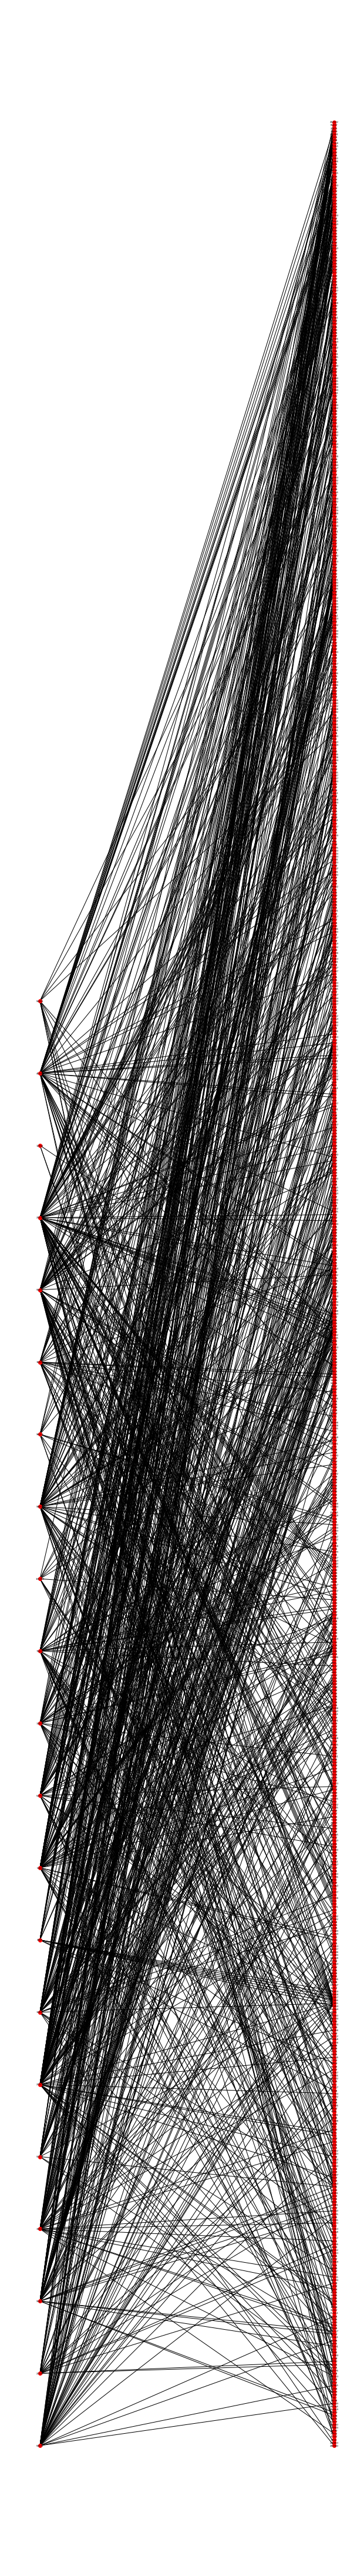

In [21]:
X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i*36)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i*1.5)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
plt.figure(figsize=(10,80))
plt.axis('off')
nx.draw_networkx(B, pos=pos, with_labels = True, font_size = 4, linewidths = 0.0001, node_shape = 'o', node_size = 50)
#plt.show()
